In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = pd.read_csv(
    "/Users/gabrielmancillas/Documents/GitHub/Customer-shopping-trends/shopping_trends.csv"
)

In [41]:
%pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [42]:
%pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [43]:
%pip install os

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [44]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [45]:
%pip install seaborn



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [46]:
%pip install nbformat



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [47]:
%pip install nbformat


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


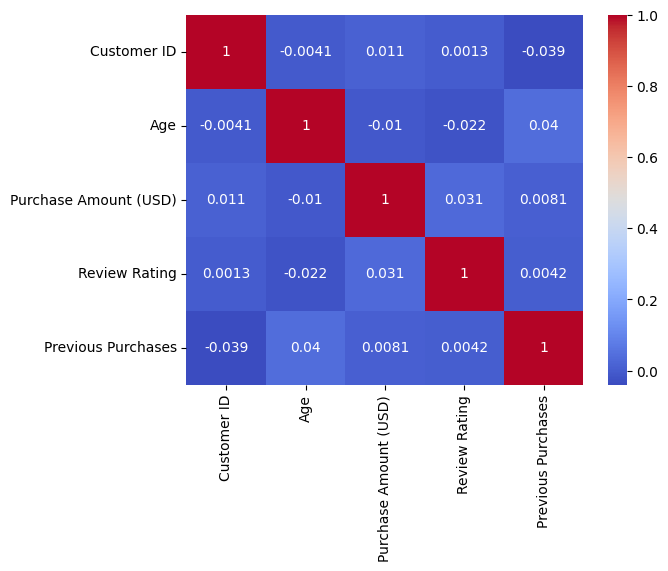

In [48]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
plotcorreration = sns.heatmap(df[numeric_columns].corr(), annot=True, cmap="coolwarm")

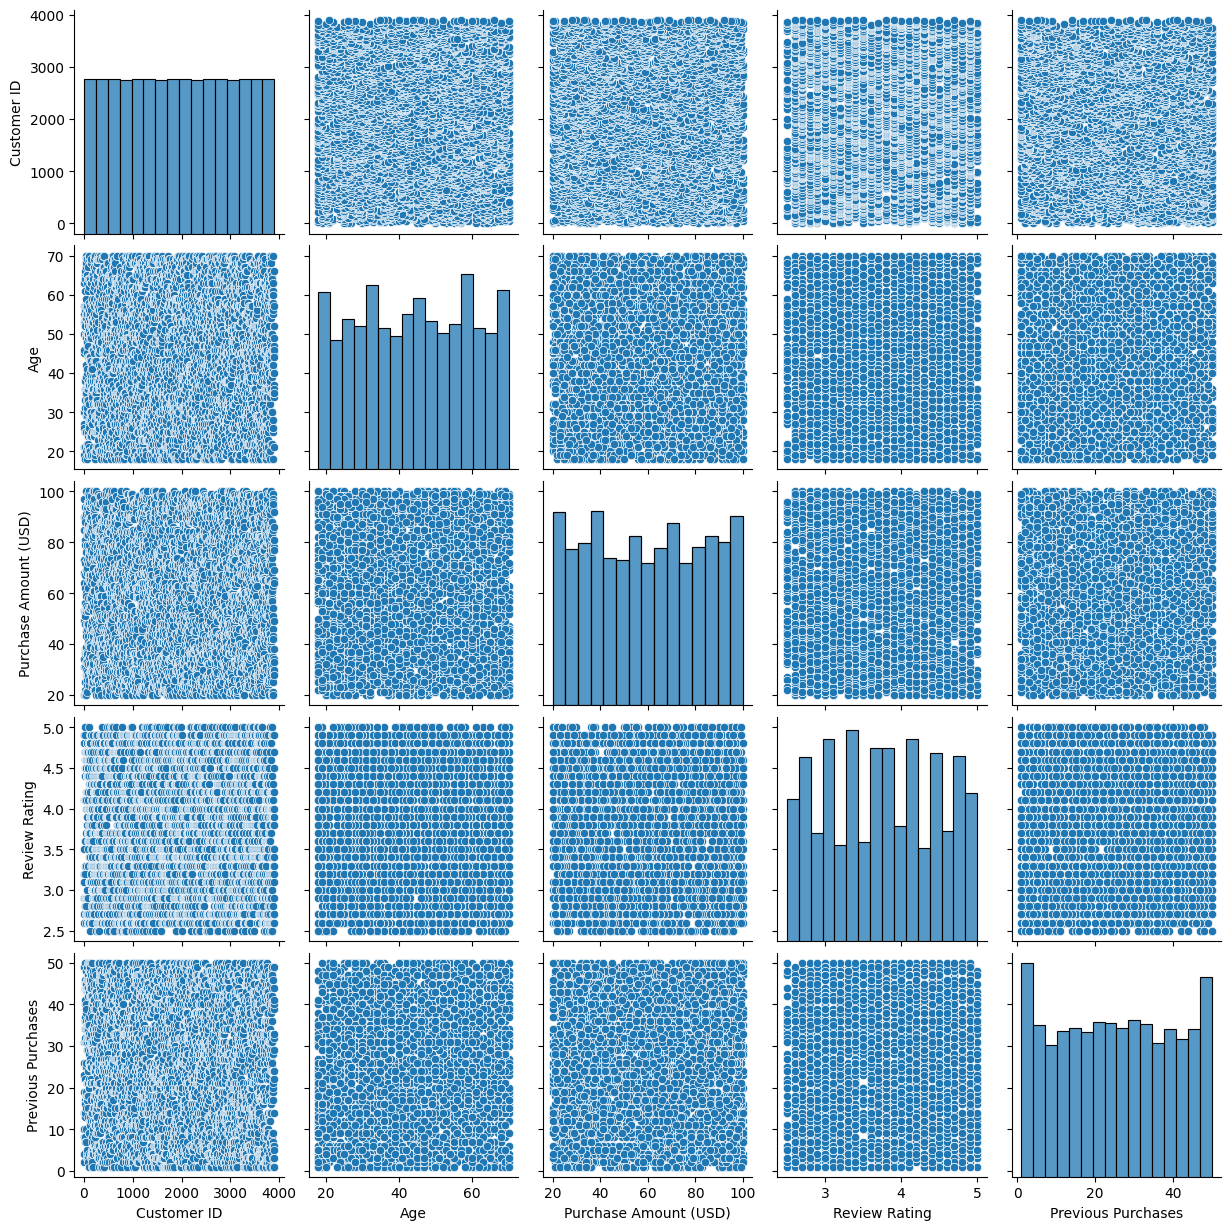

In [49]:
plotscatter = sns.pairplot(df[numeric_columns])

In [50]:
df.nunique()

Customer ID                 3900
Age                           53
Gender                         2
Item Purchased                25
Category                       4
Purchase Amount (USD)         81
Location                      50
Size                           4
Color                         25
Season                         4
Review Rating                 26
Subscription Status            2
Payment Method                 6
Shipping Type                  6
Discount Applied               2
Promo Code Used                2
Previous Purchases            50
Preferred Payment Method       6
Frequency of Purchases         7
dtype: int64

which one are the most common? 


In [67]:
season_counts = df["Season"].value_counts()
print(season_counts)

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64


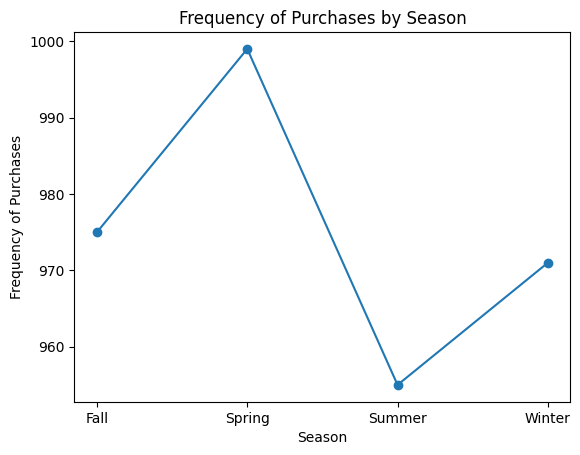

In [68]:
import matplotlib.pyplot as plt

# Group the data by season and count the frequency of purchases
season_counts = df["Season"].value_counts()

# Sort the seasons in chronological order
season_counts = season_counts.sort_index()

# Create a line graph
plt.plot(season_counts.index, season_counts.values, marker="o")

# Set the labels and title
plt.xlabel("Season")
plt.ylabel("Frequency of Purchases")
plt.title("Frequency of Purchases by Season")

# Show the plot
plt.show()

In [73]:
# Python

pivot_df = df.pivot_table(
    index="Frequency of Purchases",
    columns="Season",
    values="Customer ID",
    aggfunc="first",
)

print(pivot_df)

Season                  Fall  Spring  Summer  Winter
Frequency of Purchases                              
Annually                  46       5       9      56
Bi-Weekly                 11      17      20      86
Every 3 Months            29      66      28      21
Fortnightly               44      63      58       1
Monthly                   89      75      40      16
Quarterly                  7      10      34      18
Weekly                    25       3       6       8


In [86]:
pivot_df = df.pivot_table(
    index="Item Purchased", columns="Season", values="Customer ID", aggfunc="first"
)

print(pivot_df)

Season          Fall  Spring  Summer  Winter
Item Purchased                              
Backpack         106      66      57     276
Belt              71      60      70     249
Blouse           190       5      36       1
Boots             65     390     197     104
Coat             120      43       9      13
Dress             30      14      72      18
Gloves           142      75     161     308
Handbag           29      10      69      41
Hat              135     203      45     114
Hoodie           178      50      26     154
Jacket            25     226      33      56
Jeans            260       3      38     228
Jewelry          146      27     173      31
Pants            265      74      20      21
Sandals          136       4      81     210
Scarf             44      42      76      62
Shirt              7     558      47     206
Shoes             11     117      82      98
Shorts           157     127      28       8
Skirt            147      79     132      16
Sneakers  

In [89]:
pivot_df = df.pivot_table(
    index="Subscription Status", columns="Season", values="Customer ID", aggfunc="first"
)
pivot_table = df.pivot_table(
    index="Gender", columns="Season", values="Purchase Amount (USD)", aggfunc="sum"
)
pivot_gender = df.pivot_table(
    index="Subscription Status", columns="Gender", values="Customer ID", aggfunc="count"
)
print(pivot_table)
print(pivot_gender)
print(pivot_df)

Season   Fall  Spring  Summer  Winter
Gender                               
Female  20193   18578   18060   18360
Male    39825   40101   37717   40247
Gender               Female    Male
Subscription Status                
No                   1248.0  1599.0
Yes                     NaN  1053.0
Season               Fall  Spring  Summer  Winter
Subscription Status                              
No                   1063    1054    1059    1055
Yes                     7       3       6       1


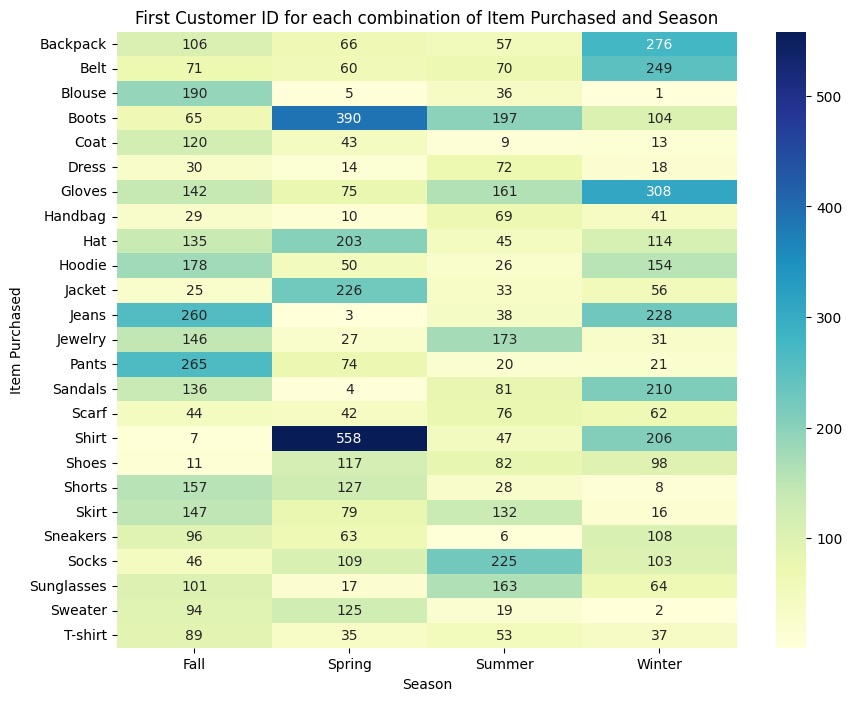

In [81]:
# Python
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming pivot_df is your pivot table
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, fmt=".0f", cmap="YlGnBu")

plt.title("First Customer ID for each combination of Item Purchased and Season")
plt.xlabel("Season")
plt.ylabel("Item Purchased")
plt.show()

In [90]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [91]:
# Python
import pandas as pd
import plotly.express as px

# Assuming 'df' is your DataFrame and it has columns 'Item Purchased', 'Gender' and 'Review Rating'
avg_ratings = (
    df.groupby(["Item Purchased", "Gender"])["Review Rating"].mean().reset_index()
)

fig = px.area(
    avg_ratings,
    x="Item Purchased",
    y="Review Rating",
    color="Gender",
    title="Average Review Rating by Item Purchased and Gender",
    facet_col="Gender",
    facet_col_wrap=1,
)

fig.update_layout(
    xaxis_title="Item Purchased",
    yaxis_title="Average Review Rating",
    legend_title="Gender",
    xaxis={"categoryorder": "total descending"},
)

fig.show()

In [92]:
%pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [93]:
total_purchase_by_category = df.groupby("Category")["Purchase Amount (USD)"].sum()
print("Total Purchase Amount by Category:")
print(total_purchase_by_category)

Total Purchase Amount by Category:
Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64


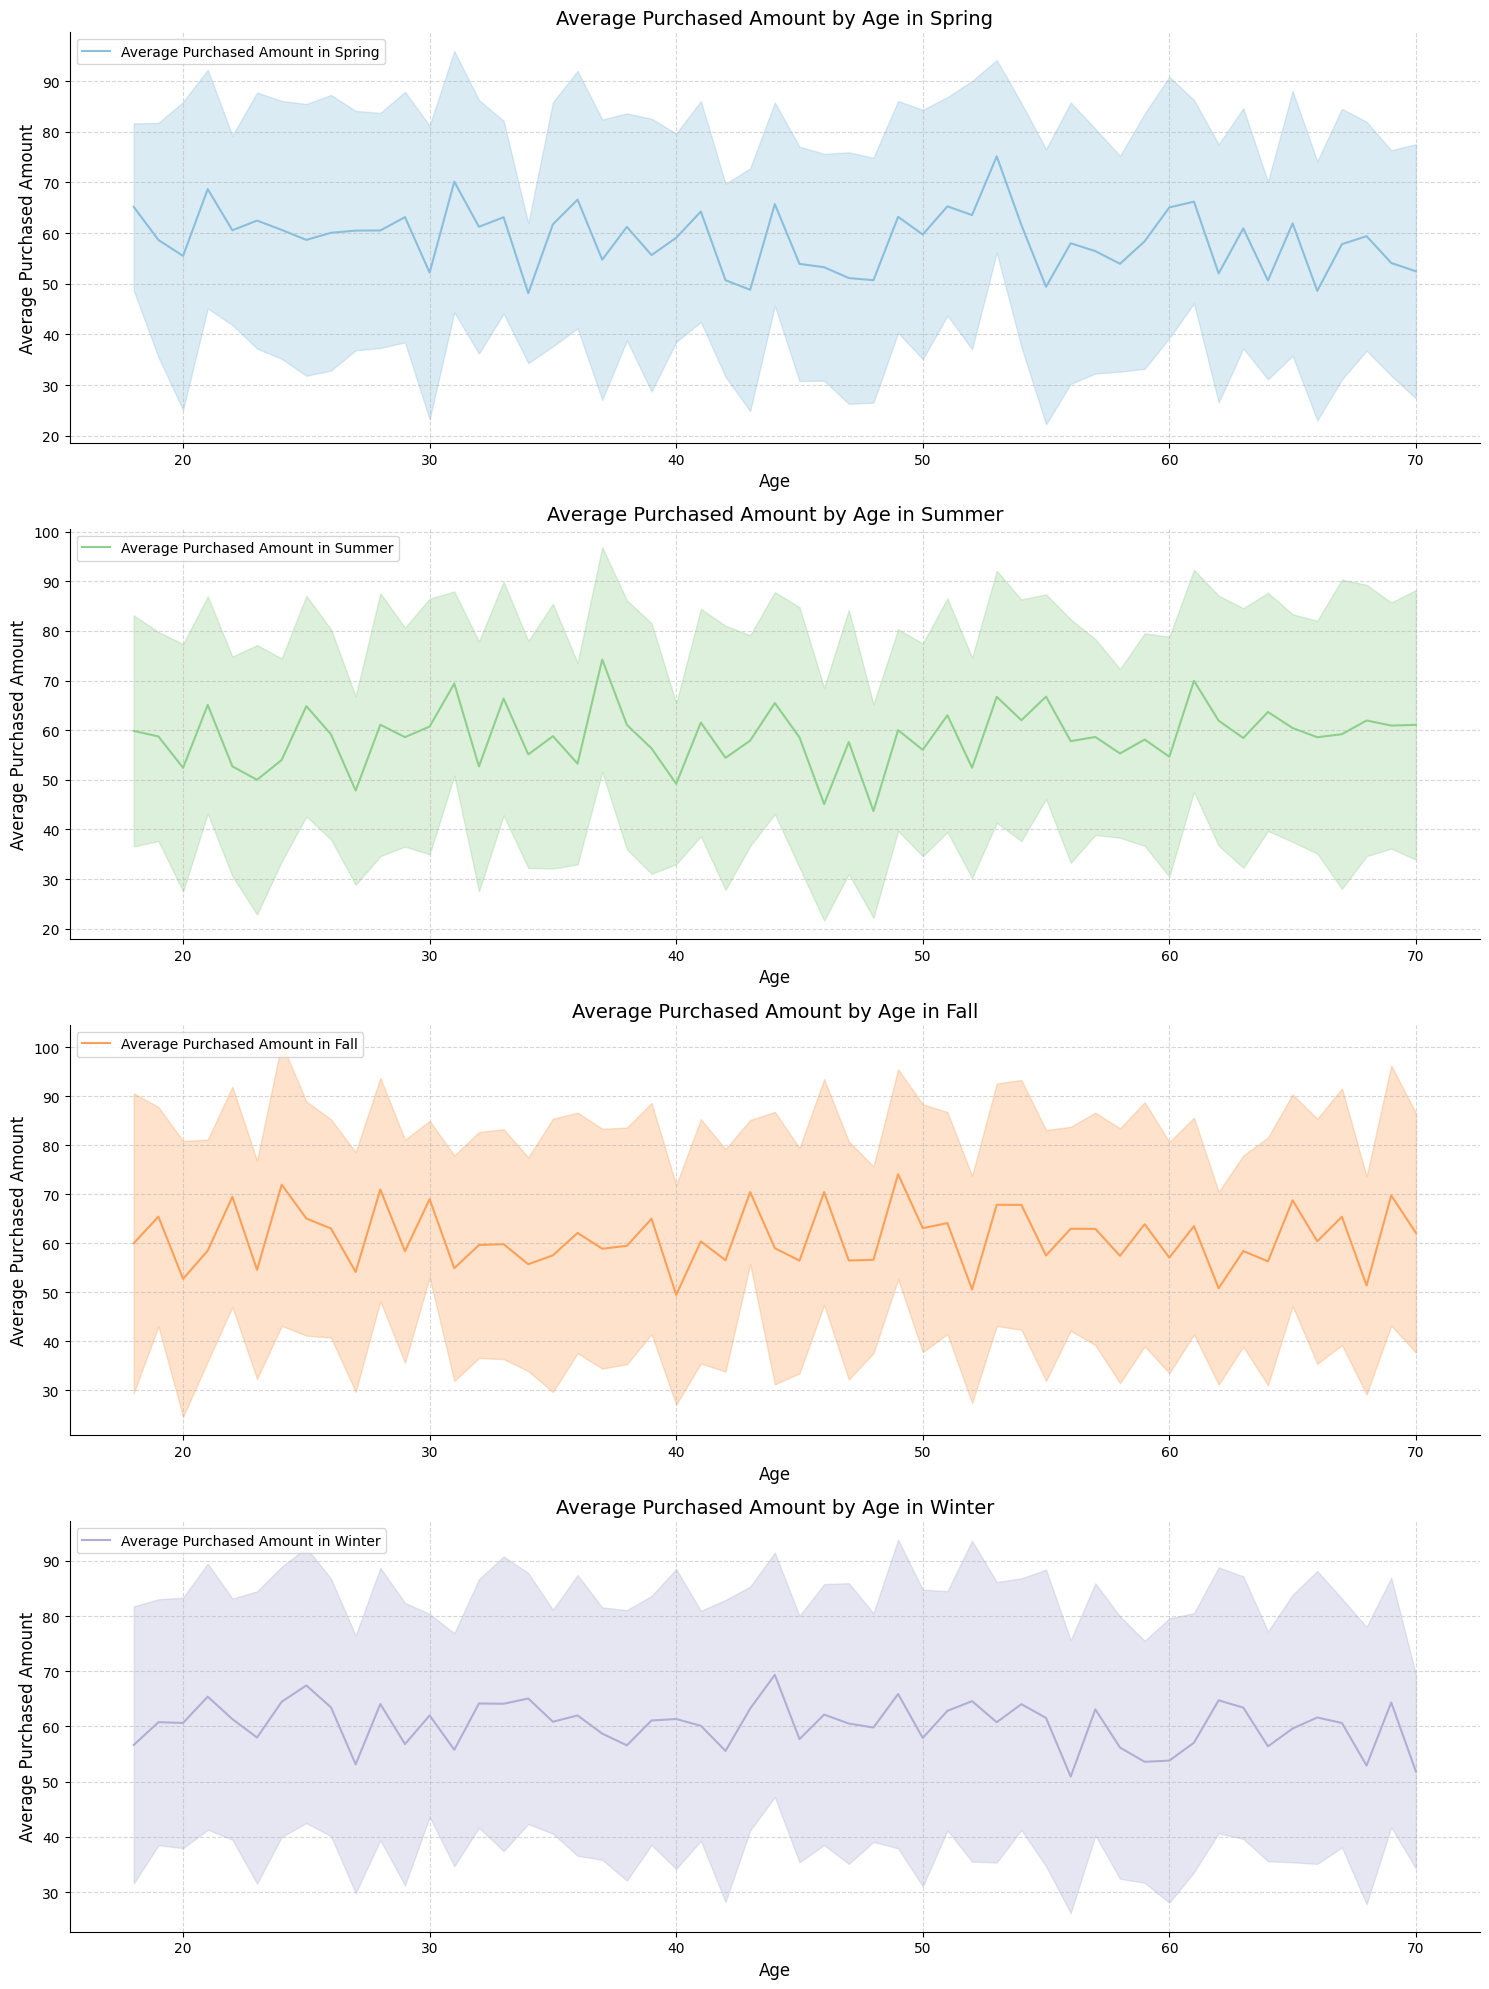

In [94]:
# Python
import matplotlib.pyplot as plt
import seaborn as sns

# Define the seasons
Season = ["Spring", "Summer", "Fall", "Winter"]

# Define color palettes for each season
color_palettes = ["Blues", "Greens", "Oranges", "Purples"]

# Create a figure with subplots for each season
fig, axes = plt.subplots(nrows=len(Season), figsize=(15, 5 * len(Season)))

# Check if we have a single season (and thus axes is not an array)
if len(Season) == 1:
    axes = [axes]

# Loop through each season and create the plots
for i, season in enumerate(Season):
    # Filter the dataset for the given season
    season_df = df[df["Season"] == season]

    # Calculate the average purchased amount by age
    avg_purchased_amount = season_df.groupby("Age")["Purchase Amount (USD)"].mean()

    # Calculate the standard deviation of purchased amount by age
    std_purchased_amount = season_df.groupby("Age")["Purchase Amount (USD)"].std()

    # Create the line plot for average purchased amount by age with error bars
    sns.lineplot(
        x=avg_purchased_amount.index,
        y=avg_purchased_amount.values,
        ax=axes[i],
        label=f"Average Purchased Amount in {season}",
        color=sns.color_palette(color_palettes[i])[2],
    )

    # Add error bars
    axes[i].fill_between(
        avg_purchased_amount.index,
        avg_purchased_amount.values - std_purchased_amount.values,
        avg_purchased_amount.values + std_purchased_amount.values,
        alpha=0.3,
        color=sns.color_palette(color_palettes[i])[2],
    )

    # Add vertical lines on each '0' marker
    for x, y in zip(avg_purchased_amount.index, avg_purchased_amount.values):
        if y == 0:
            axes[i].axvline(x=x, color="red", linestyle="--", alpha=0.5)

    # Set titles and labels
    axes[i].set_title(f"Average Purchased Amount by Age in {season}", fontsize=14)
    axes[i].set_xlabel("Age", fontsize=12)
    axes[i].set_ylabel("Average Purchased Amount", fontsize=12)

    # Add a legend
    axes[i].legend(loc="upper left", fontsize=10)

    # Customize the plot style
    axes[i].grid(True, linestyle="--", alpha=0.5)
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)

    # Set the tick label font size
    axes[i].tick_params(axis="both", which="major", labelsize=10)

    # Set the axis label font size
    axes[i].xaxis.label.set_size(12)
    axes[i].yaxis.label.set_size(12)

# Adjust the layout
plt.tight_layout()
plt.show()

In [95]:
# Python
import plotly.graph_objects as go

# Define the genders
Genders = ["Female", "Male"]

# Create a figure
fig = go.Figure()

# Loop through each gender and create the plots
for gender in Genders:
    # Filter the dataset for the given gender
    gender_df = df[df["Gender"] == gender]

    # Calculate the average purchased amount by age
    avg_purchased_amount = gender_df.groupby("Age")["Purchase Amount (USD)"].mean()

    # Create the line plot for average purchased amount by age
    fig.add_trace(
        go.Scatter(
            x=avg_purchased_amount.index,
            y=avg_purchased_amount.values,
            mode="lines+markers",
            name=f"Average Purchased Amount in {gender}",
        )
    )

# Set titles and labels
fig.update_layout(
    title="Average Purchased Amount by Age for Each Gender",
    xaxis_title="Age",
    yaxis_title="Average Purchased Amount",
)

# Show the plot
fig.show()

In [96]:
# Python
import plotly.graph_objects as go

# Define the genders
Genders = ["Female", "Male"]

# Create a figure
fig = go.Figure()

# Loop through each gender and create the plots
for gender in Genders:
    # Filter the dataset for the given gender
    gender_df = df[df["Gender"] == gender]

    # Calculate the average purchased amount by age for all seasons
    avg_purchased_amount = (
        gender_df.groupby(["Season", "Age"])["Purchase Amount (USD)"]
        .mean()
        .reset_index()
    )

    # Loop through each season and create the line plots
    for season in df["Season"].unique():
        season_data = avg_purchased_amount[avg_purchased_amount["Season"] == season]
        fig.add_trace(
            go.Scatter(
                x=season_data["Age"],
                y=season_data["Purchase Amount (USD)"],
                mode="lines+markers",
                name=f"{gender} in {season}",
            )
        )

# Set titles and labels
fig.update_layout(
    title="Average Purchased Amount by Age for Each Gender in All Seasons",
    xaxis_title="Age",
    yaxis_title="Average Purchased Amount",
)

# Show the plot
fig.show()

In [97]:
# Python
import plotly.graph_objects as go

# Define the genders
Genders = ["Female", "Male"]

# Create a figure
fig = go.Figure()

# Loop through each gender and create the plots
for gender in Genders:
    # Filter the dataset for the given gender
    gender_df = df[df["Gender"] == gender]

    # Calculate the average purchased amount by age for all seasons
    avg_purchased_amount = (
        gender_df.groupby(["Season", "Age"])["Purchase Amount (USD)"]
        .mean()
        .reset_index()
    )

    # Loop through each season and create the line plots
    for season in df["Season"].unique():
        season_data = avg_purchased_amount[avg_purchased_amount["Season"] == season]
        fig.add_trace(
            go.Scatter(
                x=season_data["Age"],
                y=season_data["Purchase Amount (USD)"],
                mode="lines+markers",
                name=f"{gender} in {season}",
            )
        )

        # Find the age with the highest average purchase amount
        max_purchase_age = season_data["Age"][
            season_data["Purchase Amount (USD)"].idxmax()
        ]

        # Add a point for the highest average purchase amount
        fig.add_trace(
            go.Scatter(
                x=[max_purchase_age],
                y=[season_data["Purchase Amount (USD)"].max()],
                mode="markers",
                marker=dict(
                    size=10,
                    color="Red",
                ),
                name=f"Highest average purchase for {gender} in {season}",
            )
        )

# Set titles and labels
fig.update_layout(
    title="Average Purchased Amount by Age for Each Gender in All Seasons",
    xaxis_title="Age",
    yaxis_title="Average Purchased Amount",
)

# Show the plot
fig.show()

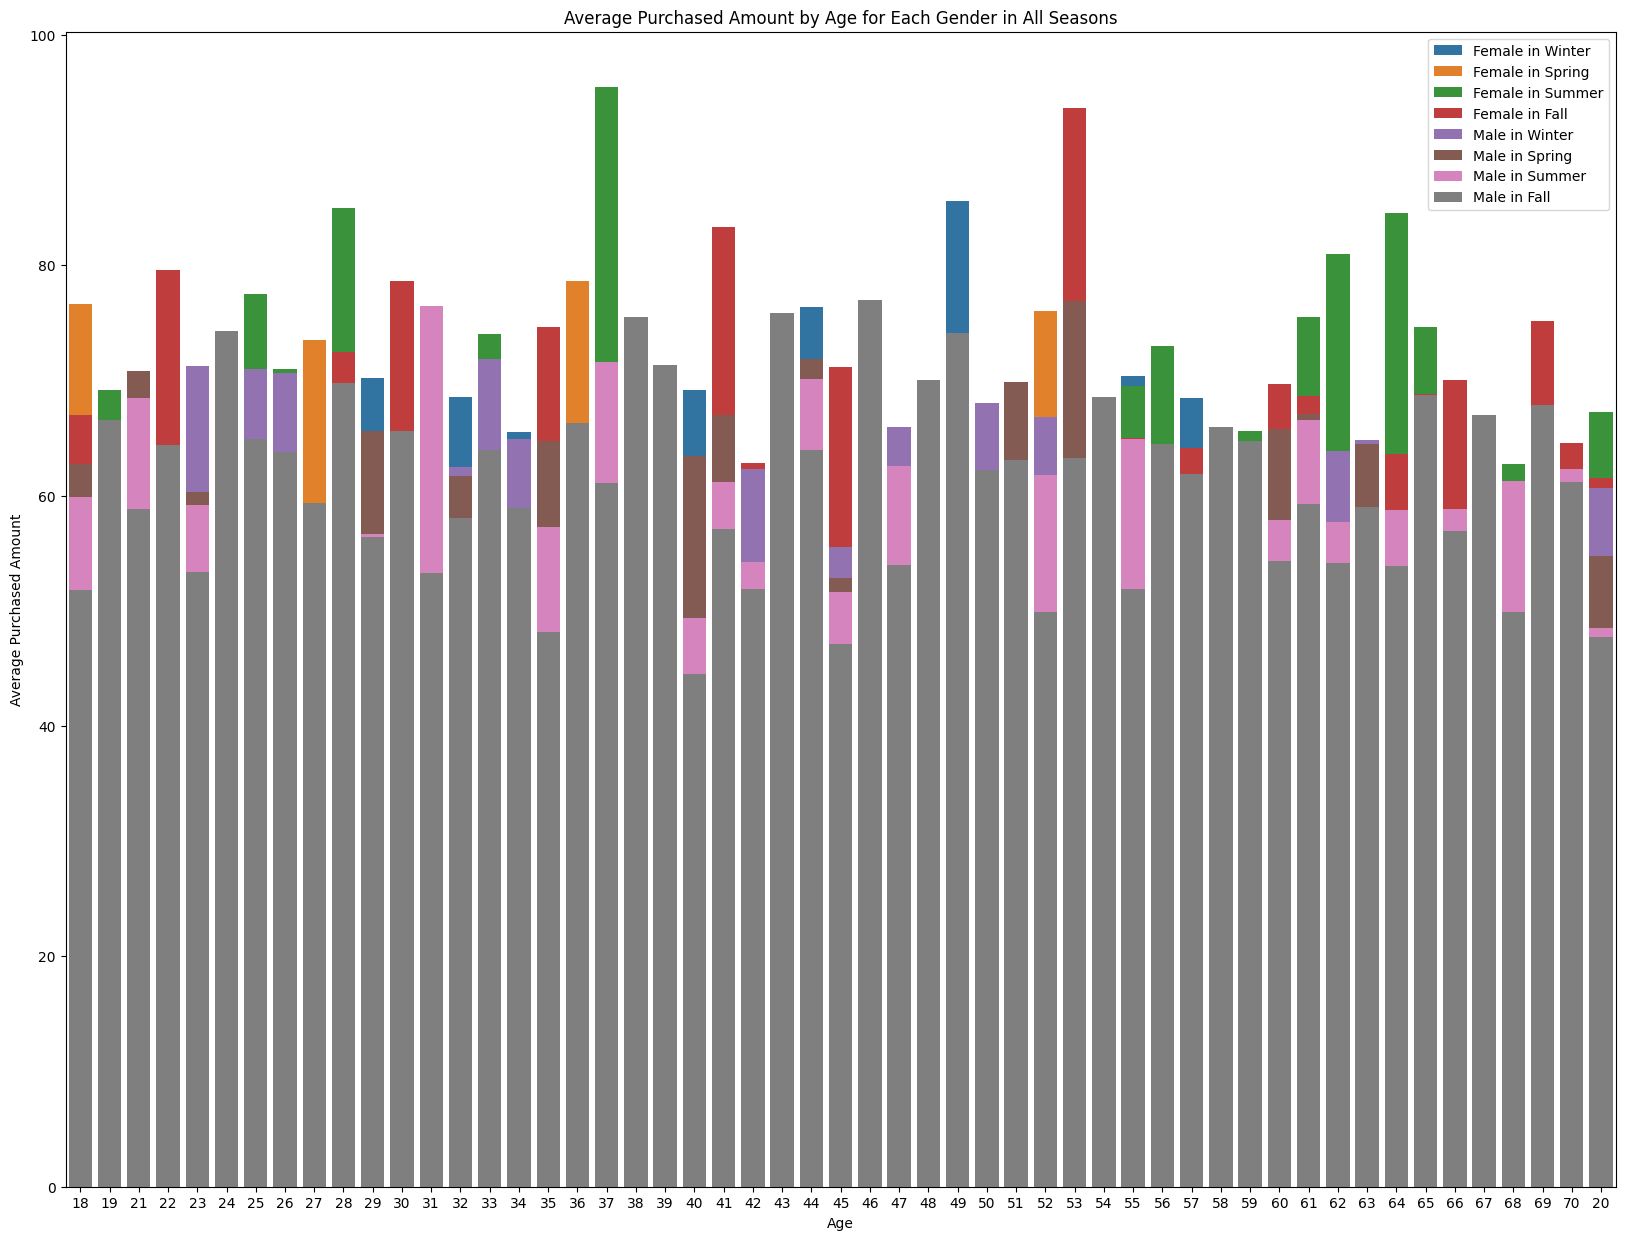

In [98]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Define the genders
genders = ["Female", "Male"]

# Create a figure
plt.figure(figsize=(20, 15))

# Loop through each gender and create the bar plots
for gender in genders:
    # Filter the dataset for the given gender
    gender_data = df[df["Gender"] == gender]

    # Calculate the average purchased amount by age for all seasons
    avg_purchased_amount = (
        gender_data.groupby(["Season", "Age"])["Purchase Amount (USD)"]
        .mean()
        .reset_index()
    )

    # Loop through each season and create the bar plots
    for season in df["Season"].unique():
        season_data = avg_purchased_amount[avg_purchased_amount["Season"] == season]
        sns.barplot(
            x=season_data["Age"],
            y=season_data["Purchase Amount (USD)"],
            label=f"{gender} in {season}",
        )

# Set titles and labels
plt.title("Average Purchased Amount by Age for Each Gender in All Seasons")
plt.xlabel("Age")
plt.ylabel("Average Purchased Amount")
plt.legend()

# Show the plot
plt.show()

In [99]:
# Python
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the genders and seasons
Genders = df["Gender"].unique()
Seasons = df["Season"].unique()

# Create a subplot for each gender
fig = make_subplots(rows=len(Genders), subplot_titles=Genders)

# Loop through each gender and create the plots
for i, gender in enumerate(Genders, start=1):
    # Filter the dataset for the given gender
    gender_df = df[df["Gender"] == gender]

    # Loop through each season and create the scatter plots
    for season in Seasons:
        # Filter the dataset for the given season
        season_df = gender_df[gender_df["Season"] == season]

        # Calculate the average purchased amount by age
        avg_purchased_amount = season_df.groupby("Age")["Purchase Amount (USD)"].mean()

        # Create the scatter plot
        fig.add_trace(
            go.Scatter(
                x=avg_purchased_amount.index,
                y=avg_purchased_amount.values,
                mode="markers",
                name=season,
            ),
            row=i,
            col=1,
        )

# Set titles and labels
fig.update_layout(
    height=800,
    width=800,
    title_text="Average Purchased Amount by Age for Each Gender in All Seasons",
    showlegend=False,
)
fig.update_xaxes(title_text="Age")
fig.update_yaxes(title_text="Average Purchased Amount")

# Set a different color palette
colors = [
    "rgb(31, 119, 180)",
    "rgb(255, 127, 14)",
    "rgb(44, 160, 44)",
    "rgb(214, 39, 40)",
]
for i, trace in enumerate(fig.data):
    trace.marker.color = colors[i % len(colors)]

# Show the plot
fig.show()

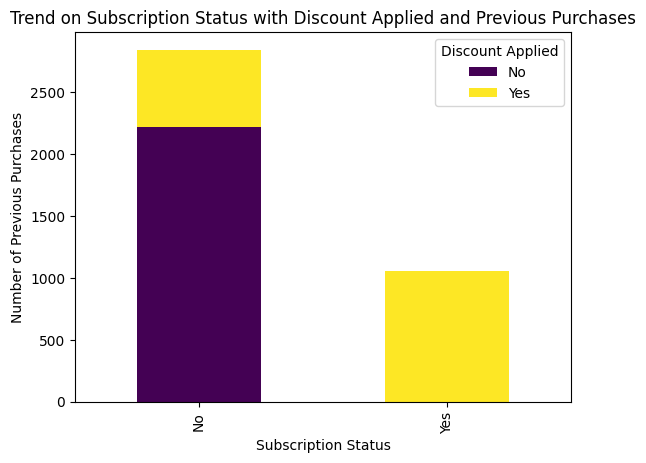

In [100]:
import matplotlib.pyplot as plt

# Group the data by subscription status and count the number of previous purchases
subscription_counts = (
    df.groupby(["Subscription Status", "Discount Applied"])["Previous Purchases"]
    .count()
    .unstack()
)

# Plot the bar plot
subscription_counts.plot(kind="bar", stacked=True, colormap="viridis")

# Set the labels and title
plt.xlabel("Subscription Status")
plt.ylabel("Number of Previous Purchases")
plt.title("Trend on Subscription Status with Discount Applied and Previous Purchases")

# Show the plot
plt.show()

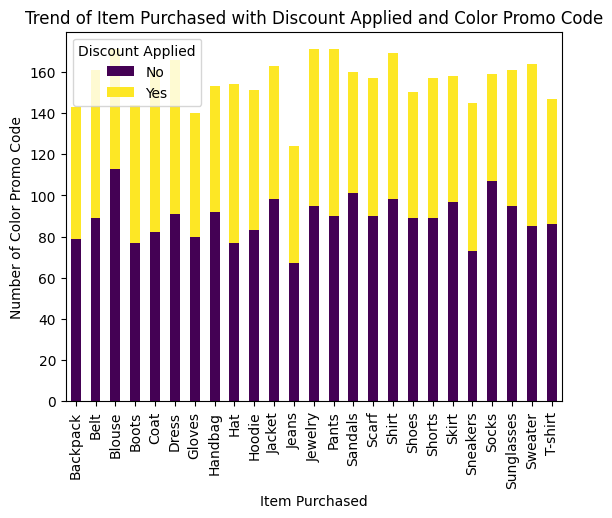

In [101]:
import matplotlib.pyplot as plt

# Group the data by Item Purchased and Discount Applied, and count the number of Color Promo Code
item_counts = (
    df.groupby(["Item Purchased", "Discount Applied"])["Promo Code Used"]
    .count()
    .unstack()
)

# Plot the bar plot
item_counts.plot(kind="bar", stacked=True, colormap="viridis")

# Set the labels and title
plt.xlabel("Item Purchased")
plt.ylabel("Number of Color Promo Code")
plt.title("Trend of Item Purchased with Discount Applied and Color Promo Code")

# Show the plot
plt.show()

In [102]:
# Group the data by Gender and count the number of Promo Code Used
promo_code_counts = df.groupby("Gender")["Promo Code Used"].count()

# Find the gender with the highest number of promo codes used
most_promo_code_gender = promo_code_counts.idxmax()

# Print the result
print(f"The gender that uses the promo code the most is: {most_promo_code_gender}")

The gender that uses the promo code the most is: Male


In [103]:
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

                       Customer ID       Age  Purchase Amount (USD)  \
Customer ID               1.000000 -0.004079               0.011048   
Age                      -0.004079  1.000000              -0.010424   
Purchase Amount (USD)     0.011048 -0.010424               1.000000   
Review Rating             0.001343 -0.021949               0.030776   
Previous Purchases       -0.039159  0.040445               0.008063   

                       Review Rating  Previous Purchases  
Customer ID                 0.001343           -0.039159  
Age                        -0.021949            0.040445  
Purchase Amount (USD)       0.030776            0.008063  
Review Rating               1.000000            0.004229  
Previous Purchases          0.004229            1.000000  
